In [1]:
### Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
### importing dataset
data= pd.read_excel('1673873388_rolling_stones_spotify.xlsx')

In [3]:
data.head()

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996000,0.932,-12.913,0.1100,118.001,0.0302,33,48640
1,1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233000,0.961,-4.803,0.0759,131.455,0.3180,34,253173
2,2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.4160,0.386,0.969,0.400000,0.956,-4.936,0.1150,130.066,0.3130,34,263160
3,3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,0.5670,0.369,0.985,0.000107,0.895,-5.535,0.1930,132.994,0.1470,32,305880
4,4,Donâ€™t Stop - Live,Licked Live In NYC,2022-06-10,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.4000,0.303,0.969,0.055900,0.966,-5.098,0.0930,130.533,0.2060,32,305106


In [4]:
data.shape

(1610, 18)

In [5]:
### To check if the data has duplicate observations
duplicate=data[data.duplicated()]

In [6]:
duplicate

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms


###### Observations: The data has no duplicates.

In [7]:
### To check missing values in the data
data.isnull().sum(axis=0)

Unnamed: 0          0
name                0
album               0
release_date        0
track_number        0
id                  0
uri                 0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
duration_ms         0
dtype: int64

#### Observation: There are no missing values in the dataset.

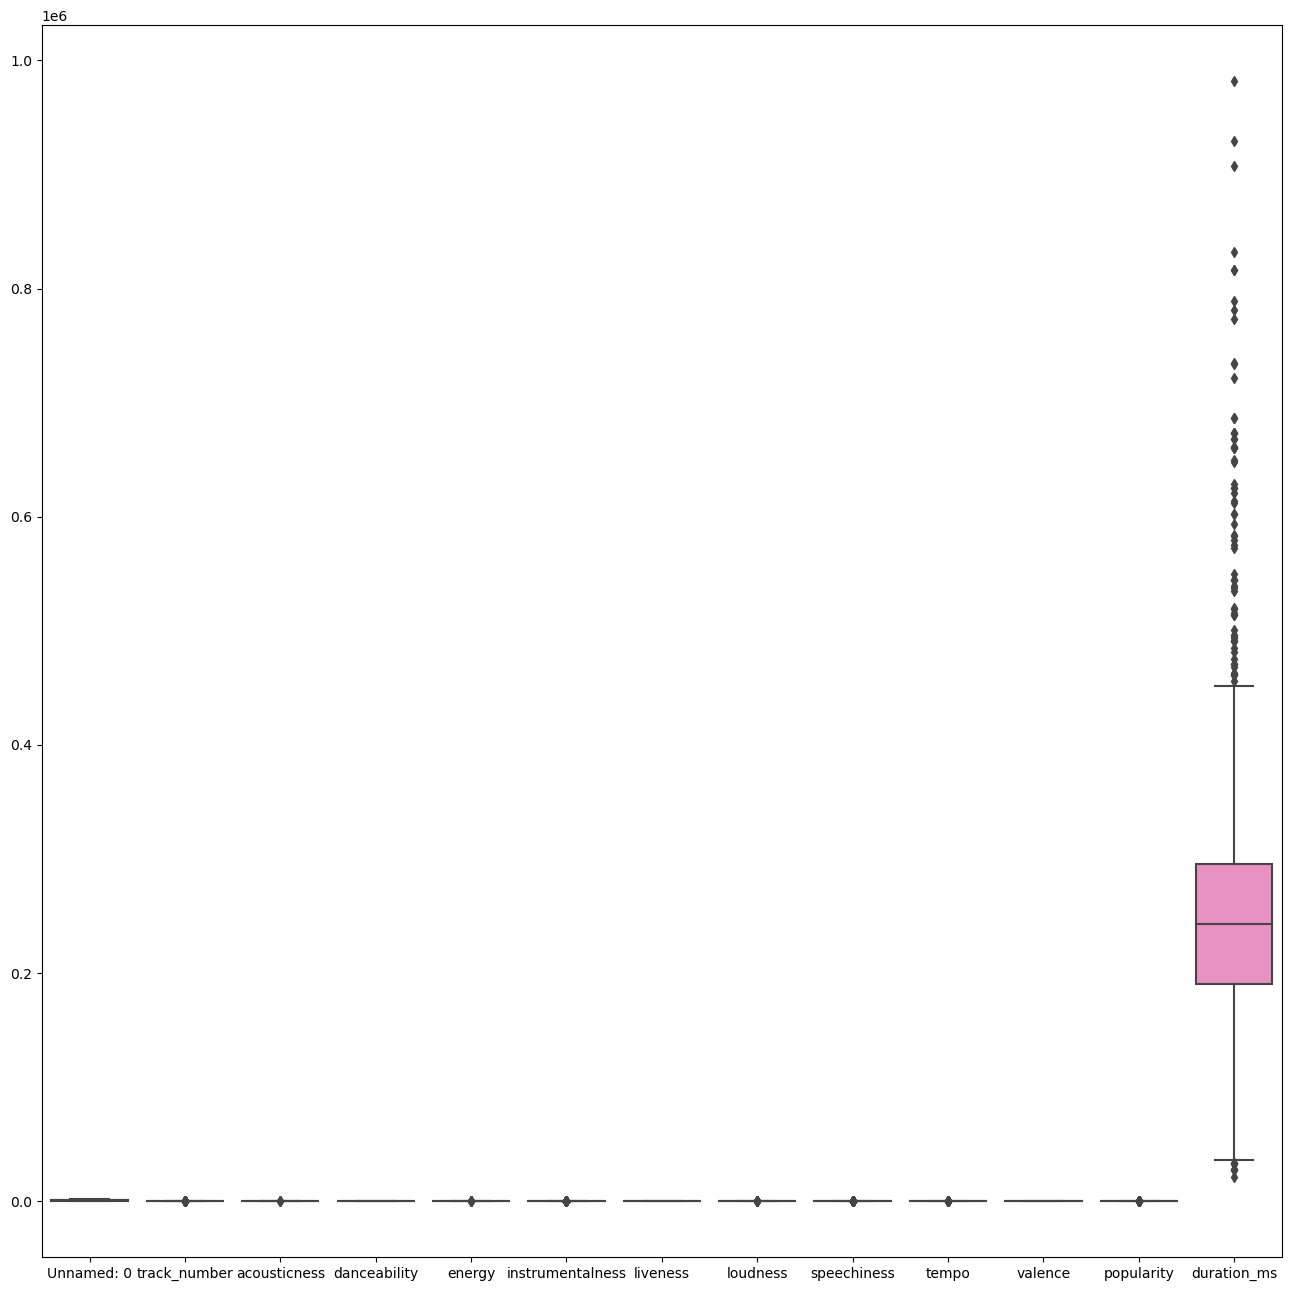

In [8]:
### Plotting graph to check the outliers
plt.figure(figsize=[16,16])
sns.boxplot(data=data)
plt.show()

##### Observation: From the boxplot it can be seen that the column duration_ms has outliers. Hence it is important to treat this outliers.

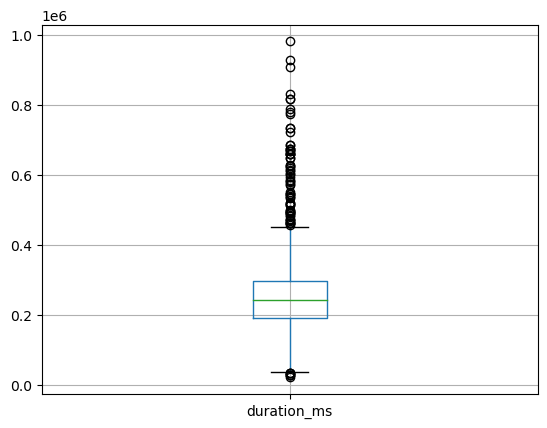

In [9]:
### Boxplot of duration_ms column
data.boxplot(column=['duration_ms'])
plt.show()

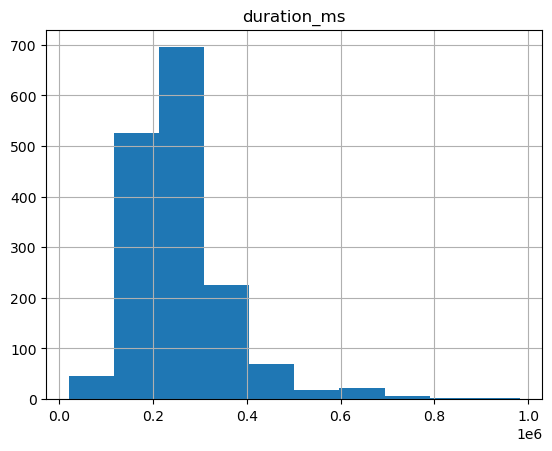

In [10]:
### Historam of duration_ms column
data.hist(column=['duration_ms'])
plt.show()

In [11]:
### z Score of duration_ms column
z_scores = (data['duration_ms'] - np.mean(data['duration_ms'])) / np.std(data['duration_ms'])

In [12]:
from scipy import stats

In [13]:
z_scores = stats.zscore(data['duration_ms'])

In [14]:
z_scores

0      -1.930719
1      -0.042138
2       0.050079
3       0.444539
4       0.437392
          ...   
1605   -0.957125
1606   -0.115148
1607   -0.753985
1608   -1.256295
1609   -0.632970
Name: duration_ms, Length: 1610, dtype: float64

In [15]:
### Droping the datapoints in duration_ms having z score greater than 1.5
threshold_z = 1.5
 
outlier_indices = np.where(z_scores > threshold_z)[0]
no_outliers = data.drop(outlier_indices)
print("Original DataFrame Shape:", data.shape)
print("DataFrame Shape after Removing Outliers:", no_outliers.shape)

Original DataFrame Shape: (1610, 18)
DataFrame Shape after Removing Outliers: (1511, 18)


In [16]:
### Droping the datapoints in duration_ms having z score less than -2
threshold_z = -2
 
outlier_indices_01 = np.where(z_scores < threshold_z)[0]
data_final =no_outliers.drop(outlier_indices_01)
print("Original DataFrame Shape:", data.shape)
print("DataFrame Shape after Removing Outliers:", data_final.shape)

Original DataFrame Shape: (1610, 18)
DataFrame Shape after Removing Outliers: (1503, 18)


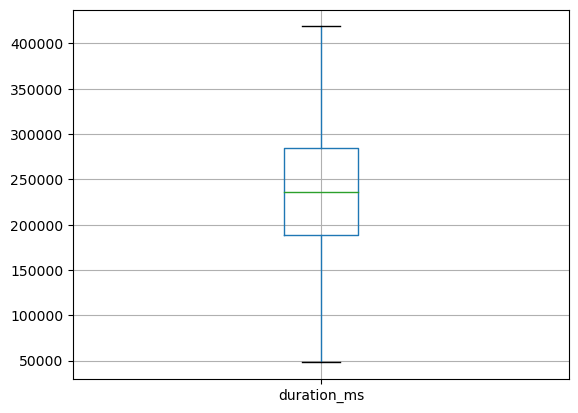

In [17]:
### Boxplot of duration_ms column after removing outliers
data_final.boxplot(column=['duration_ms'])
plt.show()

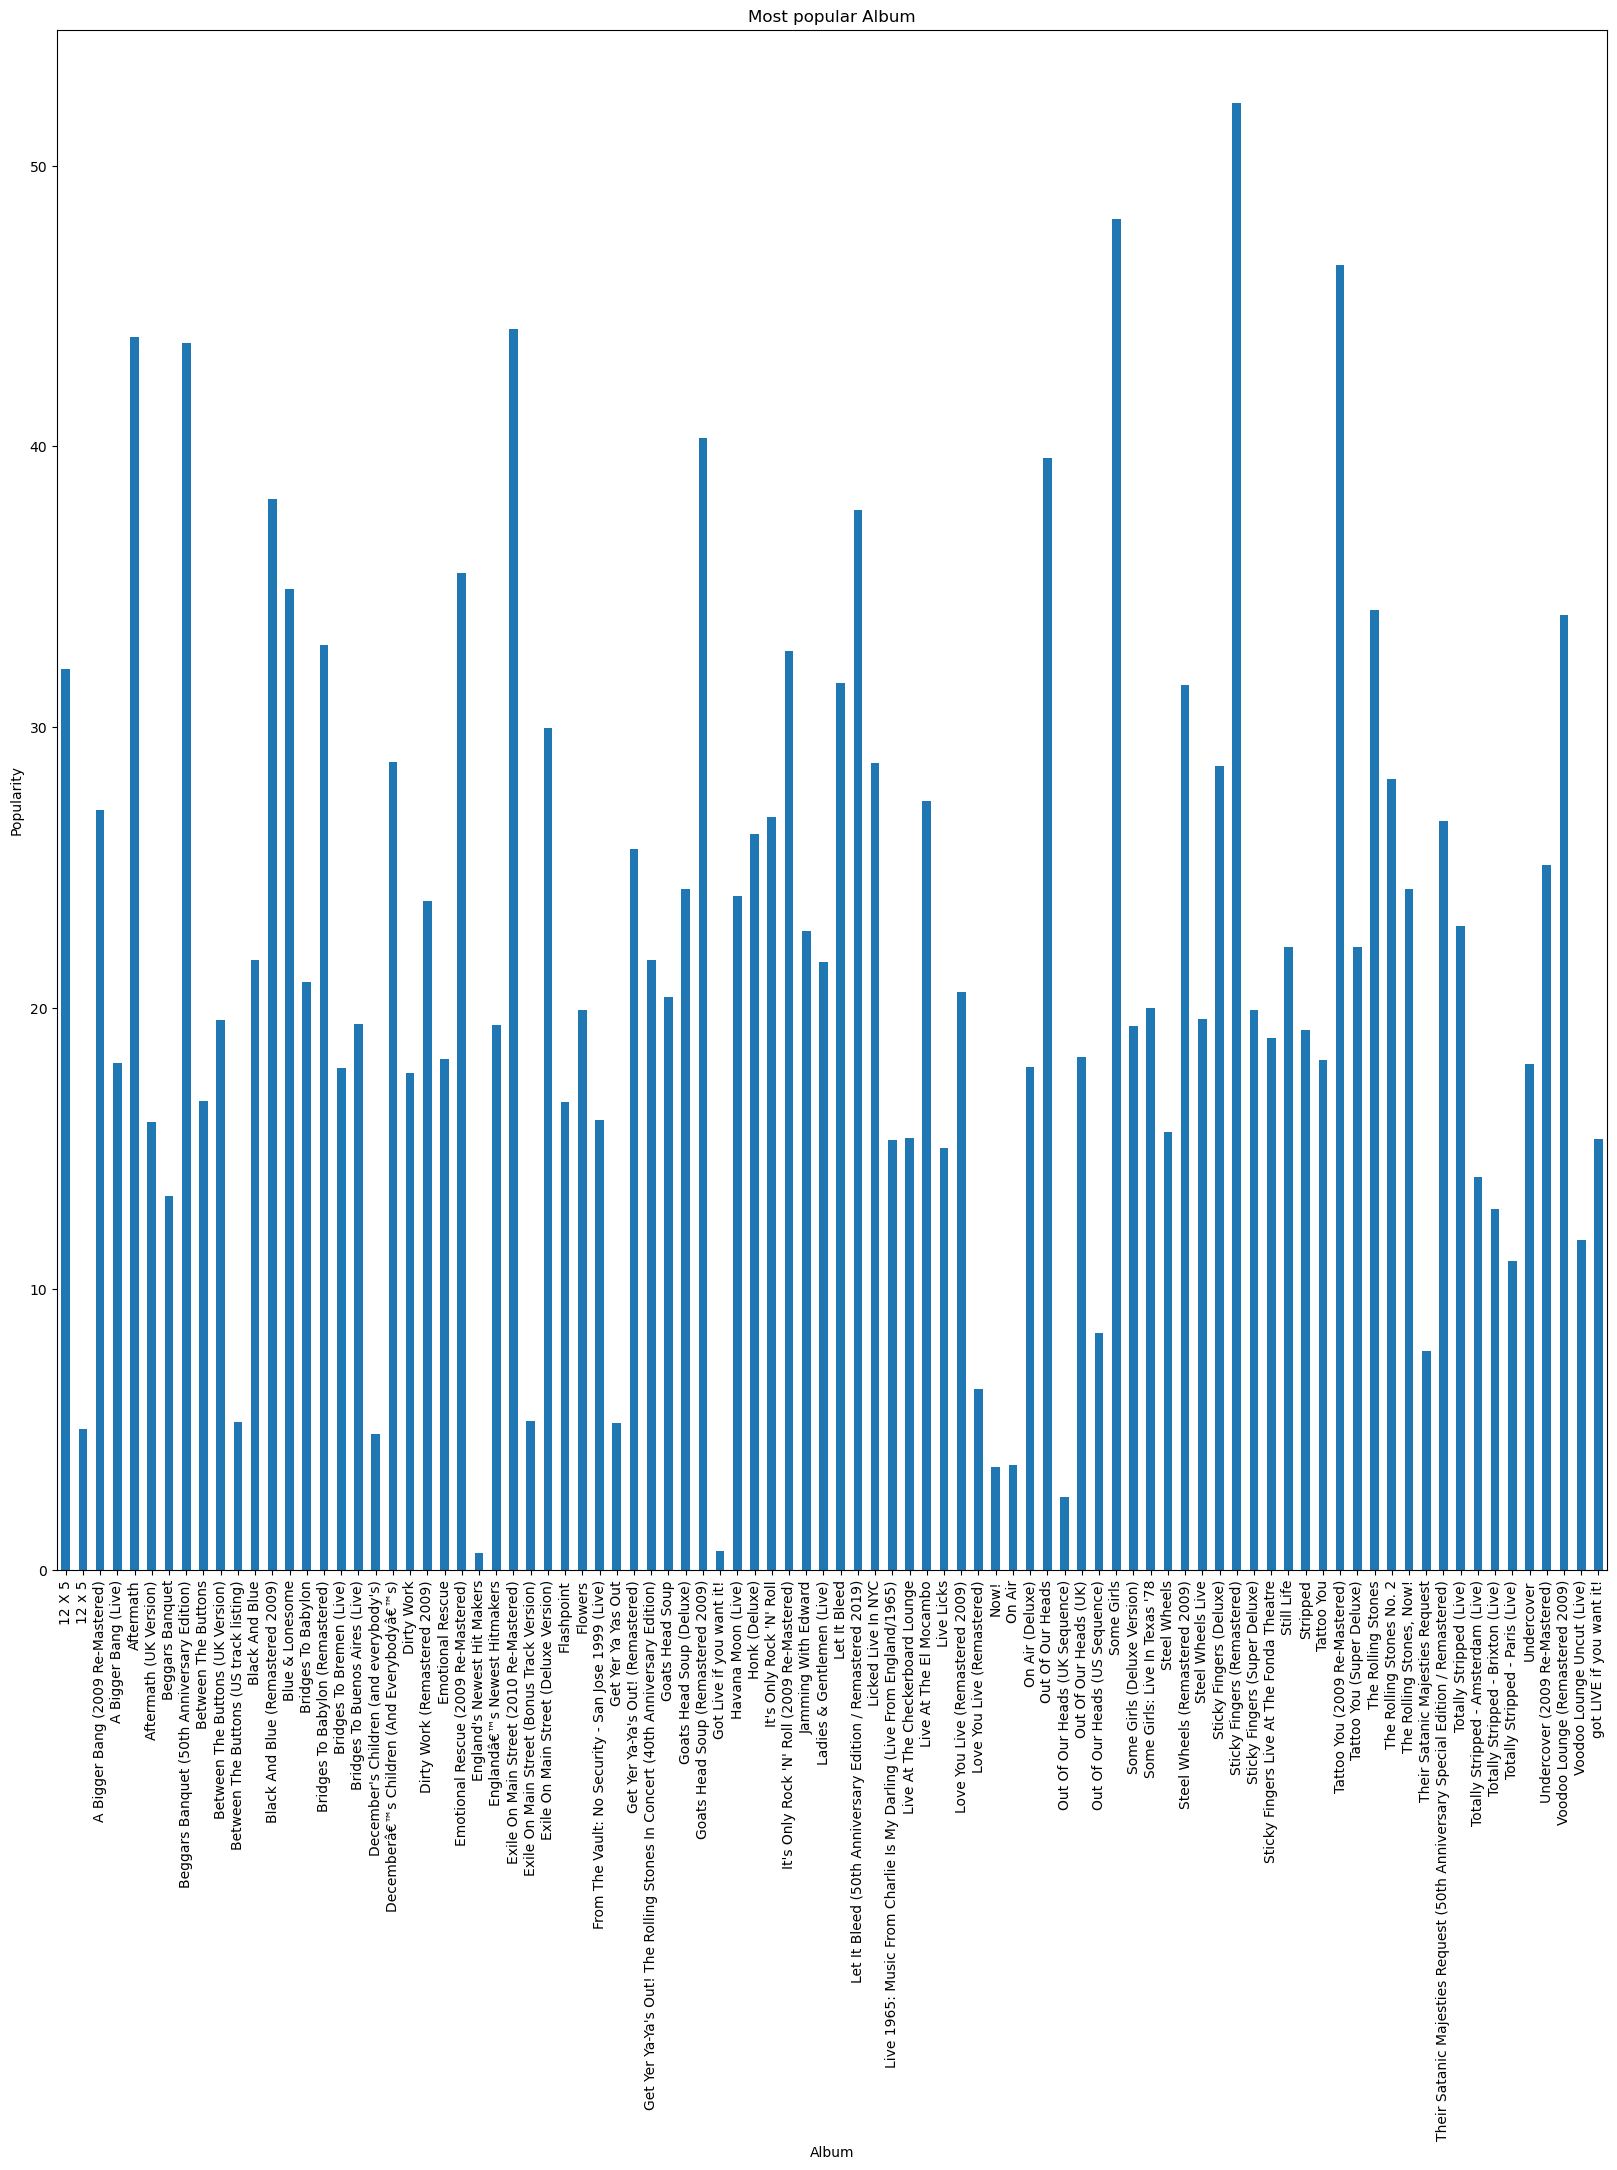

In [18]:
### To find the two most popular albums
plt.figure(figsize=(20,20))
data_final.groupby("album")["popularity"].mean().plot.bar()
plt.xlabel('Album')
plt.ylabel('Popularity')
plt.title('Most popular Album')
plt.show()

##### Conclusion: From the above graph it is clear that the two most popular albums are 1) Sticky fingers(Remastered) and 2) Some girls

In [19]:
import seaborn as sns

<Axes: xlabel='energy', ylabel='danceability'>

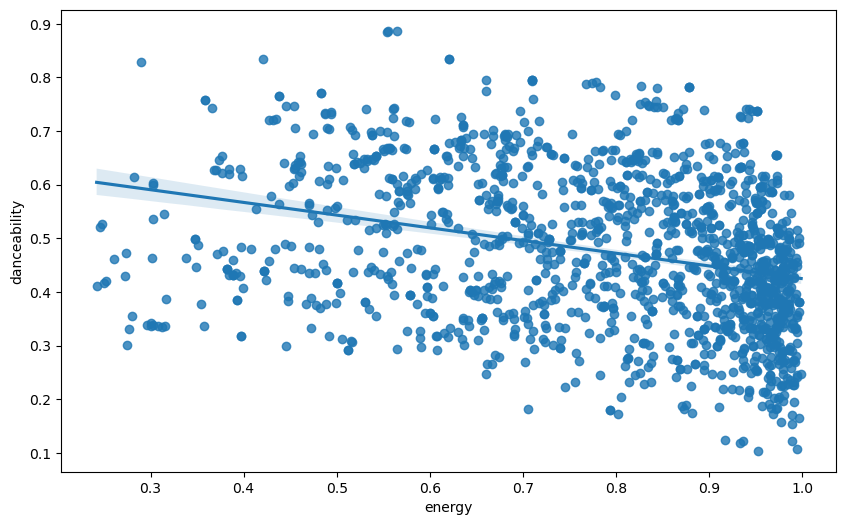

In [20]:
plt.figure(figsize=(10,6))
sns.regplot(data=data_final, y='danceability', x='energy')

Conclusion: From above regression plot it can be observed that danceability of the song is negatively correlated to the energy of the song. 

<Axes: xlabel='loudness', ylabel='danceability'>

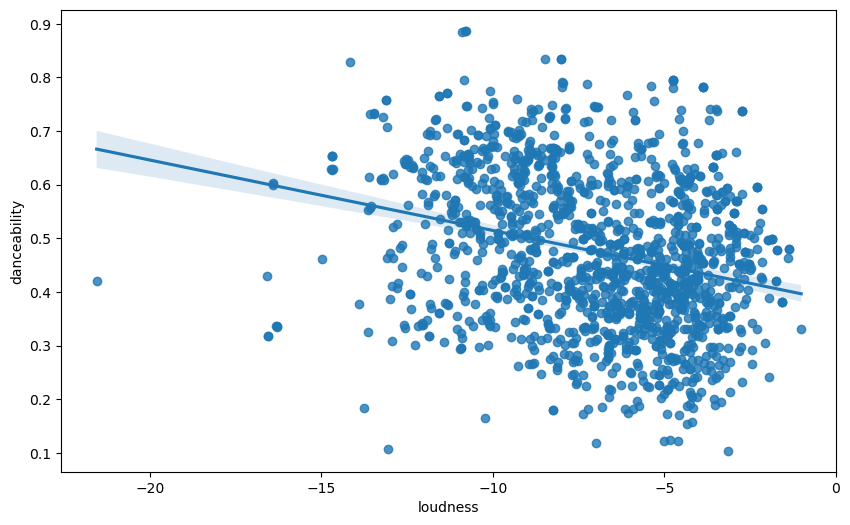

In [21]:
plt.figure(figsize=(10,6))
sns.regplot(data=data_final, x='loudness', y='danceability')

Conclusion: The danceability of a song is negatively correlated with the loudness of the song

<Axes: xlabel='valence', ylabel='danceability'>

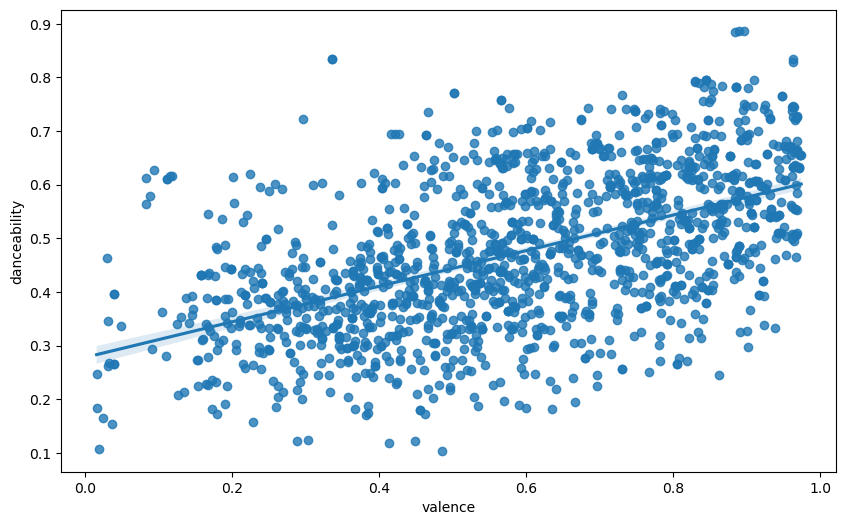

In [22]:
plt.figure(figsize=(10,6))
sns.regplot(data=data_final, x='valence', y='danceability')

Conclusion: The danceability of the song depends upon the valence of the song.

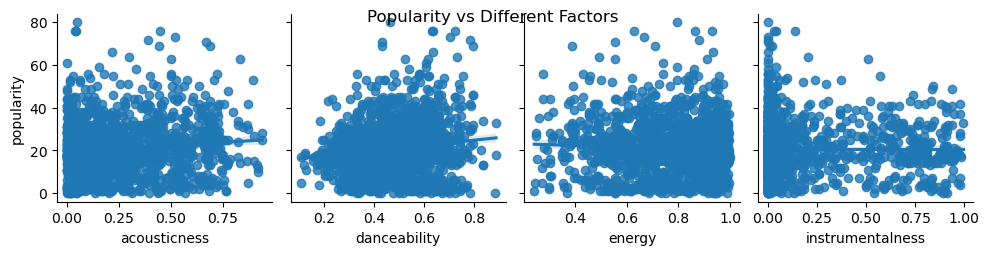

In [23]:
sns.pairplot(data_final, x_vars=['acousticness', 'danceability', 'energy','instrumentalness'], y_vars=['popularity'], kind='reg')
plt.suptitle("Popularity vs Different Factors")
plt.show()

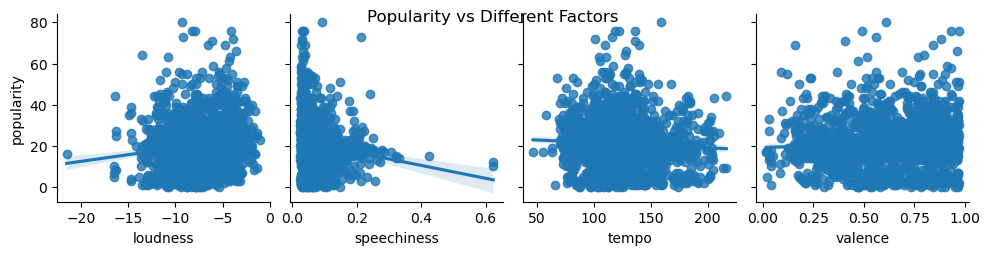

In [24]:
sns.pairplot(data_final, x_vars=[ 'loudness','speechiness','tempo','valence'], y_vars=['popularity'], kind='reg')
plt.suptitle("Popularity vs Different Factors")
plt.show()

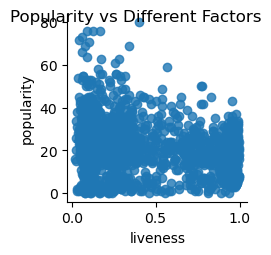

In [25]:
sns.pairplot(data_final, x_vars=[ 'liveness'], y_vars=['popularity'], kind='reg')
plt.suptitle("Popularity vs Different Factors")
plt.show()

Conclusion: 
The popularity of a song depends on the danceability and loudness of the song.

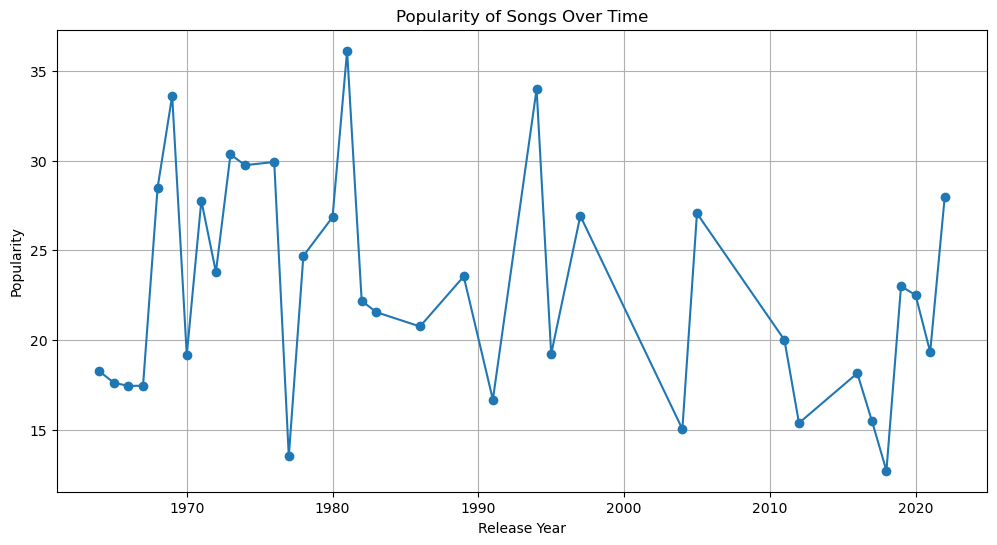

In [26]:
# Convert release_date to datetime format
data_final['release_date'] = pd.to_datetime(data_final['release_date'])

# Group by release_year and calculate mean popularity for each year
popularity_over_time = data_final.groupby(data_final['release_date'].dt.year)['popularity'].mean()

# Plot popularity over time
plt.figure(figsize=(12, 6))
popularity_over_time.plot(marker='o', linestyle='-')
plt.title("Popularity of Songs Over Time")
plt.xlabel("Release Year")
plt.ylabel("Popularity")
plt.grid(True)
plt.show()

Conclusion: Above graph shows have a songs popularity has changed over time.

In [27]:
### Dimentionality Reduction
data_final.drop(['track_number','id','uri','release_date'], axis=1)

,Unnamed: 0,name,album,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0,Concert Intro Music - Live,Licked Live In NYC,0.0824,0.463,0.993,0.996000,0.9320,-12.913,0.1100,118.001,0.0302,33,48640
1,1,Street Fighting Man - Live,Licked Live In NYC,0.4370,0.326,0.965,0.233000,0.9610,-4.803,0.0759,131.455,0.3180,34,253173
2,2,Start Me Up - Live,Licked Live In NYC,0.4160,0.386,0.969,0.400000,0.9560,-4.936,0.1150,130.066,0.3130,34,263160
3,3,If You Can't Rock Me - Live,Licked Live In NYC,0.5670,0.369,0.985,0.000107,0.8950,-5.535,0.1930,132.994,0.1470,32,305880
4,4,Donâ€™t Stop - Live,Licked Live In NYC,0.4000,0.303,0.969,0.055900,0.9660,-5.098,0.0930,130.533,0.2060,32,305106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,1605,Carol,The Rolling Stones,0.1570,0.466,0.932,0.006170,0.3240,-9.214,0.0429,177.340,0.9670,39,154080
1606,1606,Tell Me,The Rolling Stones,0.0576,0.509,0.706,0.000002,0.5160,-9.427,0.0843,122.015,0.4460,36,245266
1607,1607,Can I Get A Witness,The Rolling Stones,0.3710,0.790,0.774,0.000000,0.0669,-7.961,0.0720,97.035,0.8350,30,176080
1608,1608,You Can Make It If You Try,The Rolling Stones,0.2170,0.700,0.546,0.000070,0.1660,-9.567,0.0622,102.634,0.5320,27,121680


In [28]:
from sklearn.cluster import KMeans

In [29]:
sse = []
k_rng = range(1,10)
for k in k_rng:
 km = KMeans(n_clusters=k)
 km.fit(data_final[['acousticness', 'danceability', 'energy','instrumentalness', 'loudness','speechiness','tempo','valence','liveness']])
 sse.append(km.inertia_)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\clust

In [30]:
sse

[1325583.7884202811,
 502136.36498560745,
 252087.31460503547,
 138372.43137552292,
 97420.0295892709,
 71556.81171705484,
 56968.23139955773,
 44845.72135691729,
 38882.059927067356]

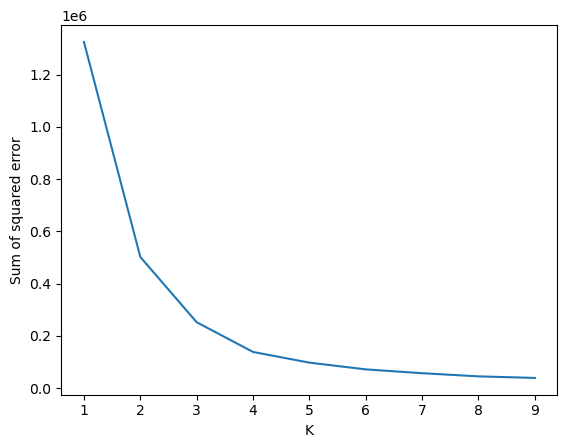

In [31]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [32]:
from sklearn.cluster import KMeans

In [33]:
km = KMeans(n_clusters=4)
y_predicted = km.fit_predict(data_final[['acousticness', 'danceability', 'energy','instrumentalness', 'loudness','speechiness','tempo','valence','liveness']])
y_predicted

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 3, 3, ..., 2, 1, 1])

In [34]:
data_final['cluster']=y_predicted
data_final.sample(5)

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,cluster
805,805,Had It With You,Dirty Work,1986-03-24,9,7iEFja3s31vhM0KVKqL3xO,spotify:track:7iEFja3s31vhM0KVKqL3xO,0.3900,0.512,0.986,0.590000,0.0597,-2.897,0.2290,169.018,0.398,17,198266,0
1528,1528,You Can't Catch Me,"The Rolling Stones, Now!",1965-02-13,3,4mcalqFylXtZpLl0hQPQ8y,spotify:track:4mcalqFylXtZpLl0hQPQ8y,0.0604,0.653,0.900,0.005640,0.3540,-10.149,0.0450,104.244,0.853,20,219480,1
1565,1565,Time Is On My Side - Mono Version / Organ Intro,12 X 5,1964-10-17,4,4s8wL4SxEmAEd6XO9mi1Pn,spotify:track:4s8wL4SxEmAEd6XO9mi1Pn,0.3430,0.229,0.830,0.000000,0.0712,-7.591,0.1390,216.304,0.423,44,172693,0
1562,1562,Around And Around,12 X 5,1964-10-17,1,5uAiJO2YixjY3LtkIK3FUJ,spotify:track:5uAiJO2YixjY3LtkIK3FUJ,0.4560,0.317,0.607,0.000054,0.2880,-11.862,0.0647,185.991,0.747,35,183146,0
1064,1064,Sweet Black Angel,Exile On Main Street (Bonus Track Version),1972-05-12,8,3tCfiQMAb4gwt38Zeal6G6,spotify:track:3tCfiQMAb4gwt38Zeal6G6,0.6500,0.498,0.728,0.000172,0.1140,-7.387,0.0373,174.330,0.609,5,177666,0


In [44]:
centroids=km.cluster_centers_

In [45]:
centroids

array([[ 2.30993155e-01,  3.39609626e-01,  7.87122995e-01,
         1.76704216e-01, -7.23102139e+00,  8.36834225e-02,
         1.80164112e+02,  5.43430481e-01,  4.68168984e-01],
       [ 2.46232655e-01,  5.38760589e-01,  7.79147330e-01,
         1.42214992e-01, -7.24628177e+00,  5.86410681e-02,
         1.14419066e+02,  6.34598527e-01,  4.26564273e-01],
       [ 3.27731482e-01,  4.80069343e-01,  6.84102190e-01,
         1.70077782e-01, -7.93610584e+00,  5.68043796e-02,
         8.52974343e+01,  5.39100365e-01,  3.98174453e-01],
       [ 2.11349306e-01,  4.52643287e-01,  8.59486974e-01,
         1.80877502e-01, -6.01329659e+00,  7.85547094e-02,
         1.40918573e+02,  5.95696794e-01,  5.69366533e-01]])

In [58]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select the features for clustering
X = data_final[['acousticness', 'danceability', 'energy','instrumentalness', 'loudness','speechiness','tempo','valence','liveness']]

# Standardize the features (mean=0 and variance=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the number of clusters 
num_clusters = 4

# Apply K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_scaled)

# Add cluster labels to the dataset
data_final['cluster'] = kmeans.labels_

# Display the distribution of songs across clusters
print(data_final['cluster'].value_counts())




C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


cluster
1    475
0    474
2    363
3    191
Name: count, dtype: int64
